In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

## CSV 파일 불러오기

In [3]:
df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. 데이터 전처리 및 특징 확인

## 레이블 분포 확인 

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

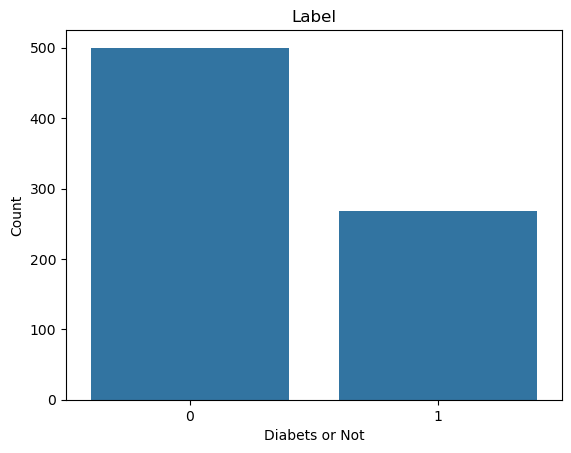

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabets or Not")
plt.ylabel("Count")
plt.title("Label")

In [7]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

## 결측치 확인

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 컬럼별 히스토그램 확인

C:\Users\tansy\AppData\Local\Temp\ipykernel_26688\3809245918.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'], kde = True, hist = False, ax=ax1)
C:\Users\tansy\AppData\Local\Temp\ipykernel_26688\3809245918.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gl

<Axes: xlabel='Glucose', ylabel='Density'>

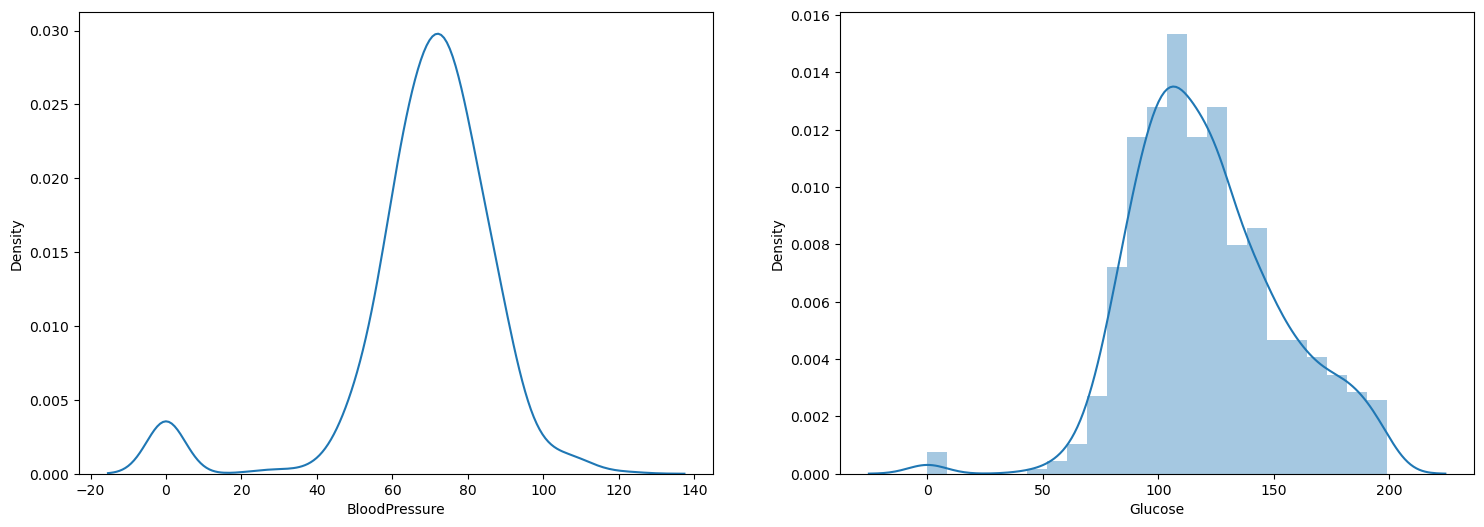

In [18]:
# 1. 두 변수간 상관관계를 파악 
# BloodPressure와 Glucose 열을 선택 

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['BloodPressure'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Glucose'], ax=ax2)

## 산점도 변수 간 상관관계 살펴보기

Text(0, 0.5, 'Glucose')

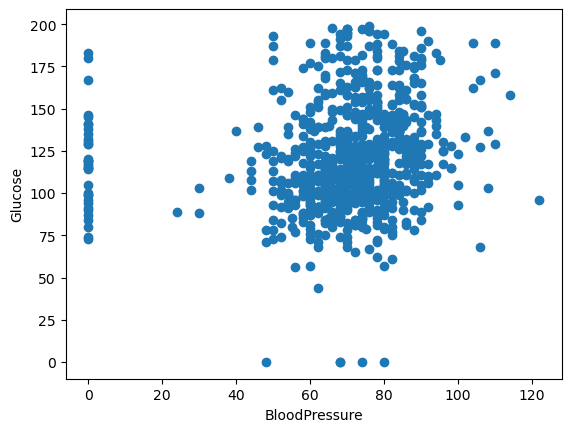

In [20]:
# 두 변수 간 산점도 
plt.scatter(df['BloodPressure'], df['Glucose'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')

In [21]:
# 모든 변수 간 상관관계 살펴보기 with pairplot 

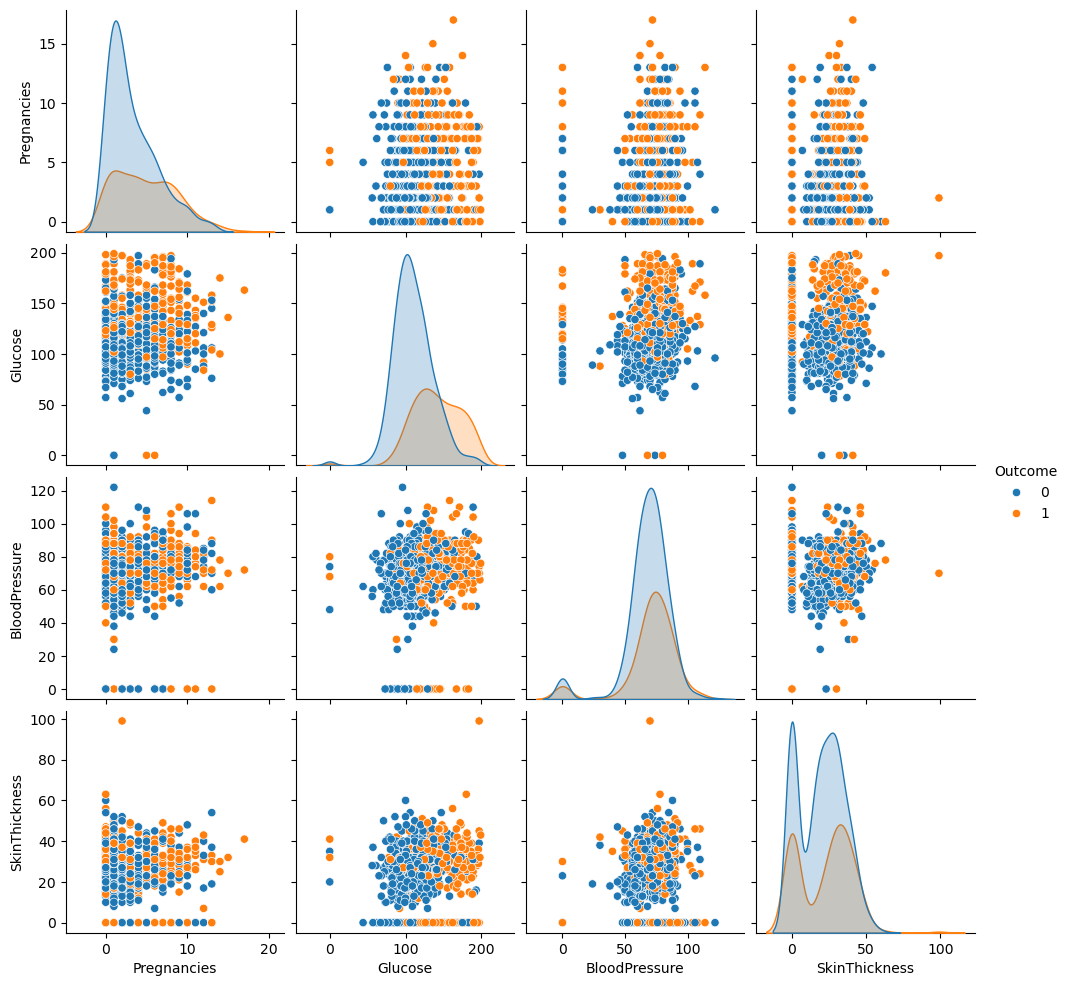

In [23]:
# 방법 2가지 

sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue='Outcome') # hue='Outcome' => Outcome 에 따라 색상 구분 


C:\Users\tansy\AppData\Local\Temp\ipykernel_26688\4054695450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pregnancies", data=df,palette="Set3") # palette="Set3" : 색상 설정


Text(0.5, 1.0, 'Pregnancies')

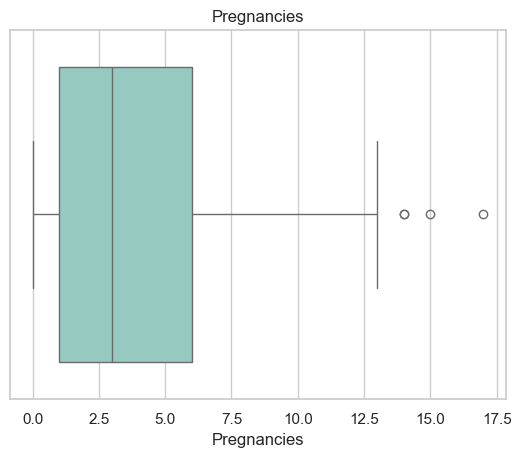

In [24]:
# 특정 칼럼의 범위 확인 및 outlier(이상치) 확인 

sns.set_theme(style="whitegrid") # 격자(세로선) 설정 
sns.boxplot(x="Pregnancies", data=df,palette="Set3") # palette="Set3" : 색상 설정 
plt.title("Pregnancies")

C:\Users\tansy\AppData\Local\Temp\ipykernel_26688\3988574146.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


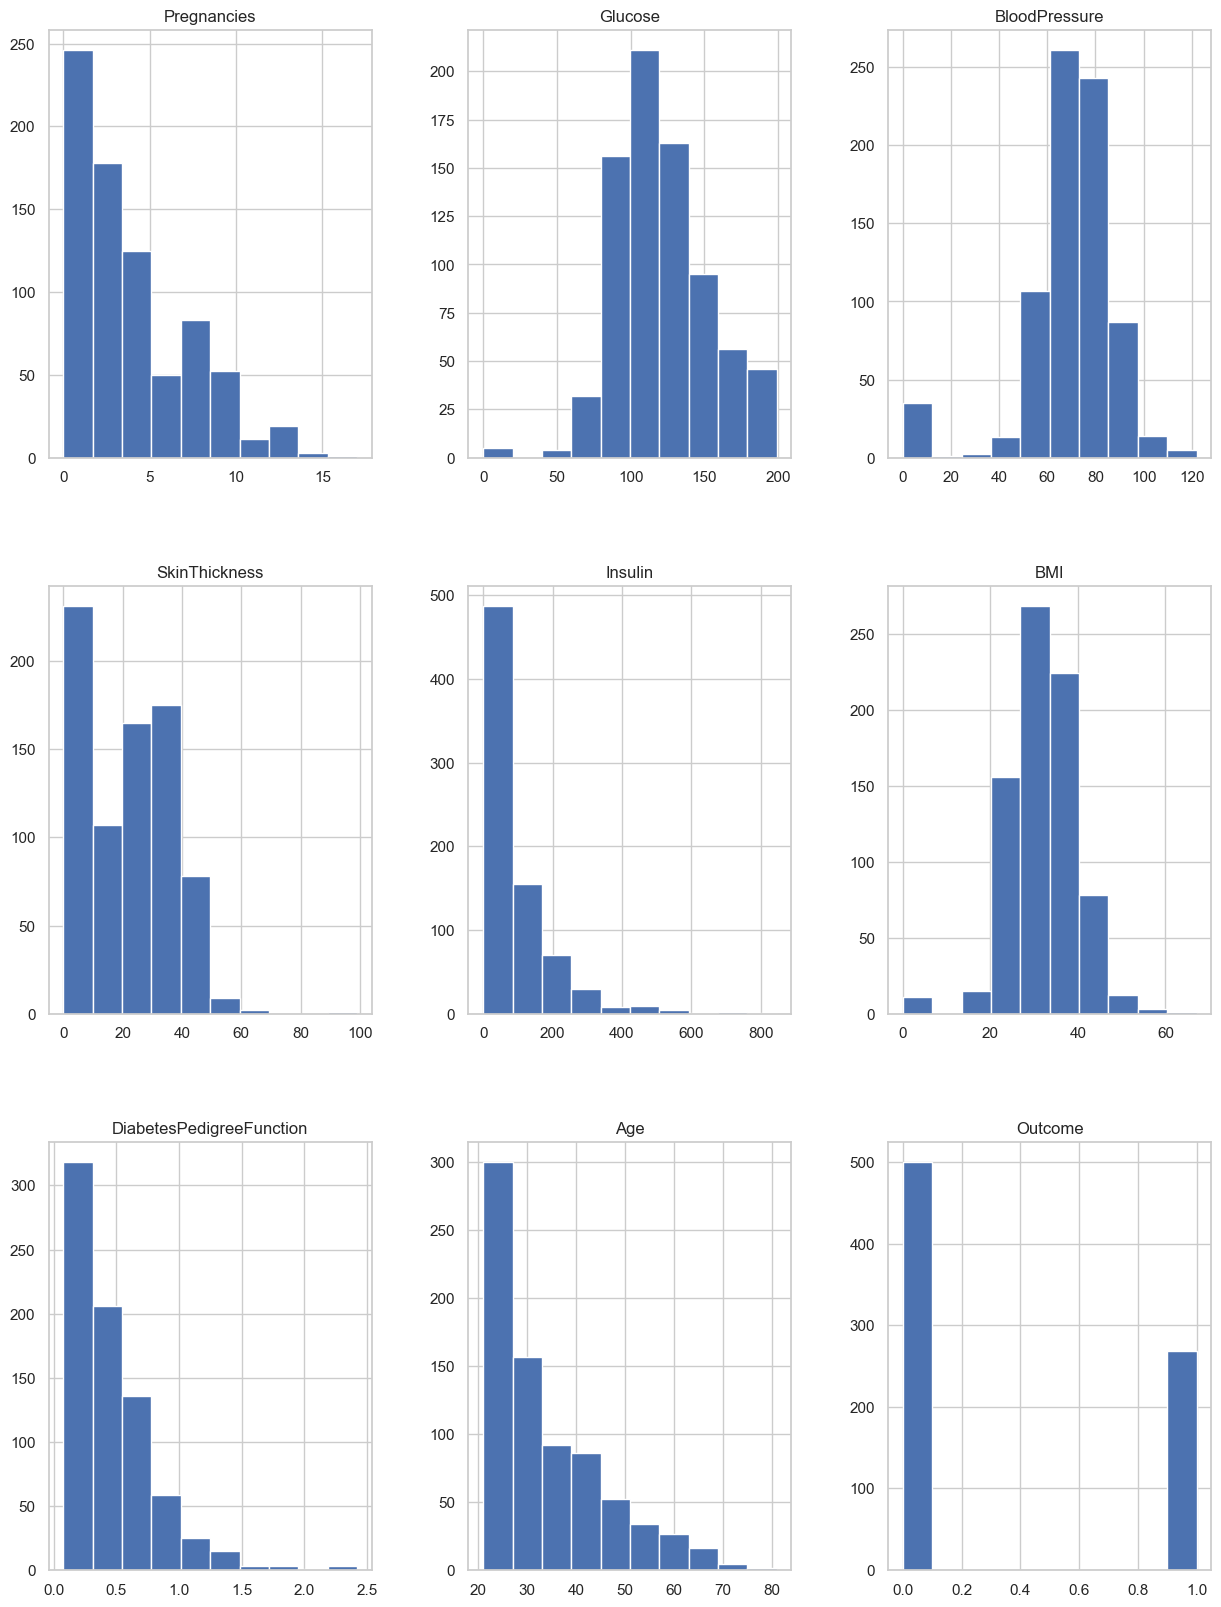

In [25]:
## 각 컬럼별 히스토그램 확인 

fig = plt.figure(figsize = (15,20))
ax = fig.gca() 
df.hist(ax = ax)
plt.show()

# 데이터 준비

In [26]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
y = df.Outcome
y.value_counts().sort_index()

Outcome
0    500
1    268
Name: count, dtype: int64

# 머신러닝 5가지 분류 수행

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 1. SVM 

In [31]:
clf_svm = SVC(random_state=0) 
clf_svm.fit(X_train, y_train) # 모델 훈련 

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


### 2. 로지스틱 회귀(Logistic Regression) 

In [34]:
clf_lr = LogisticRegression(random_state=0) 
clf_lr.fit(X_train, y_train) 

pred_lr = clf_lr.predict(X_test) # 예측값 

print ("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr)) 
print(confusion_matrix(y_test, pred_lr)) # 혼동 행렬 => 행은 실제 값, 열은 예측 값. ex) 15 => 실제 값은 0(음성)인데 15(양성)으로 예측한 경우임 


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3. 다층 퍼셉트론(MLP) 

In [35]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print("\n--- Neural Network Classifier ---") 
print(accuracy_score(y_test, pred_nn)) 
print(confusion_matrix(y_test, pred_nn)) 


--- Neural Network Classifier ---
0.7239583333333334
[[103  27]
 [ 26  36]]


## 4. 결정 트리(Decision Tree)

In [37]:
clf_dt = DecisionTreeClassifier(random_state=0) 
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test) # 예측값 

print("\n Decision Tree Classifier ---") 
print(accuracy_score(y_test, pred_dt)) # 실제 정답값과 예측값을 비교 
print(confusion_matrix(y_test, pred_dt)) 


 Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


### 5. 랜덤 포레스트(Random Forest) 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]
